In [4]:
from train import prep, trainer
from models import me_cnn
from models.extensions.metrics import Metrics
import keras as K
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.contrib.learn.python.learn.estimators._sklearn import train_test_split

ImportError: No module named train

In [3]:
X,y = prep.load_faces_dataset()
X,y, class_weight = prep.prepare_data(X,y)
model = emotion_recognition_cnn.build_model()

NameError: name 'prep' is not defined

In [51]:
def train_with_split(test_split):
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=test_split,random_state=42)
    metrics = Metrics(X_train, Y_train, "dump/")
    model.fit(X_train, Y_train, epochs=10, verbose=1,
                        validation_data=[X_validation, Y_validation], callbacks=[metrics])
    score_train = model.evaluate(X_train,Y_train)
    score_val = model.evaluate(X_validation,Y_validation)
    return metrics, score_train[1], score_val[1]

In [55]:
all_metrics = []
splits = [0.5, 0.2, 0.1, 0.01]
for split in splits:
    metrics, _, _ = train_with_split(split)
    all_metrics.append(metrics.metrics)

Train on 6582 samples, validate on 6583 samples
Epoch 1/10
6432/6582 [============================>.] - ETA: 0s - loss: 0.0494 - acc: 0.9827- train accuracy:  0.9996961409905804
- train loss:  0.049183315297221385
- train roc_auc: 0.9999989283793023
- train precision:  1.0
- train recall:  0.9989412387506618
- validation accuracy:  0.9966580586358803
- validation loss:  0.012466130443678477
- validation roc_auc: 0.9999176186100431
- validation precision:  0.9938922820655192
- validation recall:  0.9938922820655192
6582/6582 [==============================] - 4s 569us/step - loss: 0.0492 - acc: 0.9827 - val_loss: 0.0125 - val_acc: 0.9967
Epoch 2/10
6528/6582 [============================>.] - ETA: 0s - loss: 0.0371 - acc: 0.9882- train accuracy:  0.9981768459434822
- train loss:  0.03693646207605767
- train roc_auc: 0.9999929498638309
- train precision:  0.9994678020223523
- train recall:  0.9941768131286395
- validation accuracy:  0.9931642108461188
- validation loss:  0.02133235387129

- validation accuracy:  0.974933535890619
- validation loss:  0.07033027589541853
- validation roc_auc: 0.996885771429382
- validation precision:  0.9633152173913043
- validation recall:  0.9478609625668449
10532/10532 [==============================] - 5s 438us/step - loss: 0.0447 - acc: 0.9841 - val_loss: 0.0703 - val_acc: 0.9749
Epoch 5/10
10464/10532 [============================>.] - ETA: 0s - loss: 0.0386 - acc: 0.9856- train accuracy:  0.9991454614508165
- train loss:  0.03870018829186053
- train roc_auc: 0.9999889385385794
- train precision:  0.9983010533469249
- train recall:  0.9986403806934059
- validation accuracy:  0.973034561336878
- validation loss:  0.07619664046002224
- validation roc_auc: 0.9962715783202598
- validation precision:  0.9580514208389715
- validation recall:  0.946524064171123
10532/10532 [==============================] - 5s 430us/step - loss: 0.0387 - acc: 0.9856 - val_loss: 0.0762 - val_acc: 0.9730
Epoch 6/10
10432/10532 [============================>.

Epoch 8/10
11808/11848 [============================>.] - ETA: 0s - loss: 0.0447 - acc: 0.9852- train accuracy:  0.9988183659689399
- train loss:  0.044645392292836
- train roc_auc: 0.9999842911173656
- train precision:  0.9972997299729973
- train recall:  0.9984980474617002
- validation accuracy:  0.9567198177676538
- validation loss:  0.1278724081718116
- validation roc_auc: 0.990156932741455
- validation precision:  0.9269662921348315
- validation recall:  0.9141274238227147
11848/11848 [==============================] - 5s 411us/step - loss: 0.0446 - acc: 0.9851 - val_loss: 0.1279 - val_acc: 0.9567
Epoch 9/10
11776/11848 [============================>.] - ETA: 0s - loss: 0.0404 - acc: 0.9866- train accuracy:  0.9989027683997299
- train loss:  0.04063675584449828
- train roc_auc: 0.9999877467189329
- train precision:  0.9970023980815348
- train recall:  0.9990988284770201
- validation accuracy:  0.9574791192103265
- validation loss:  0.13201475985229422
- validation roc_auc: 0.99228

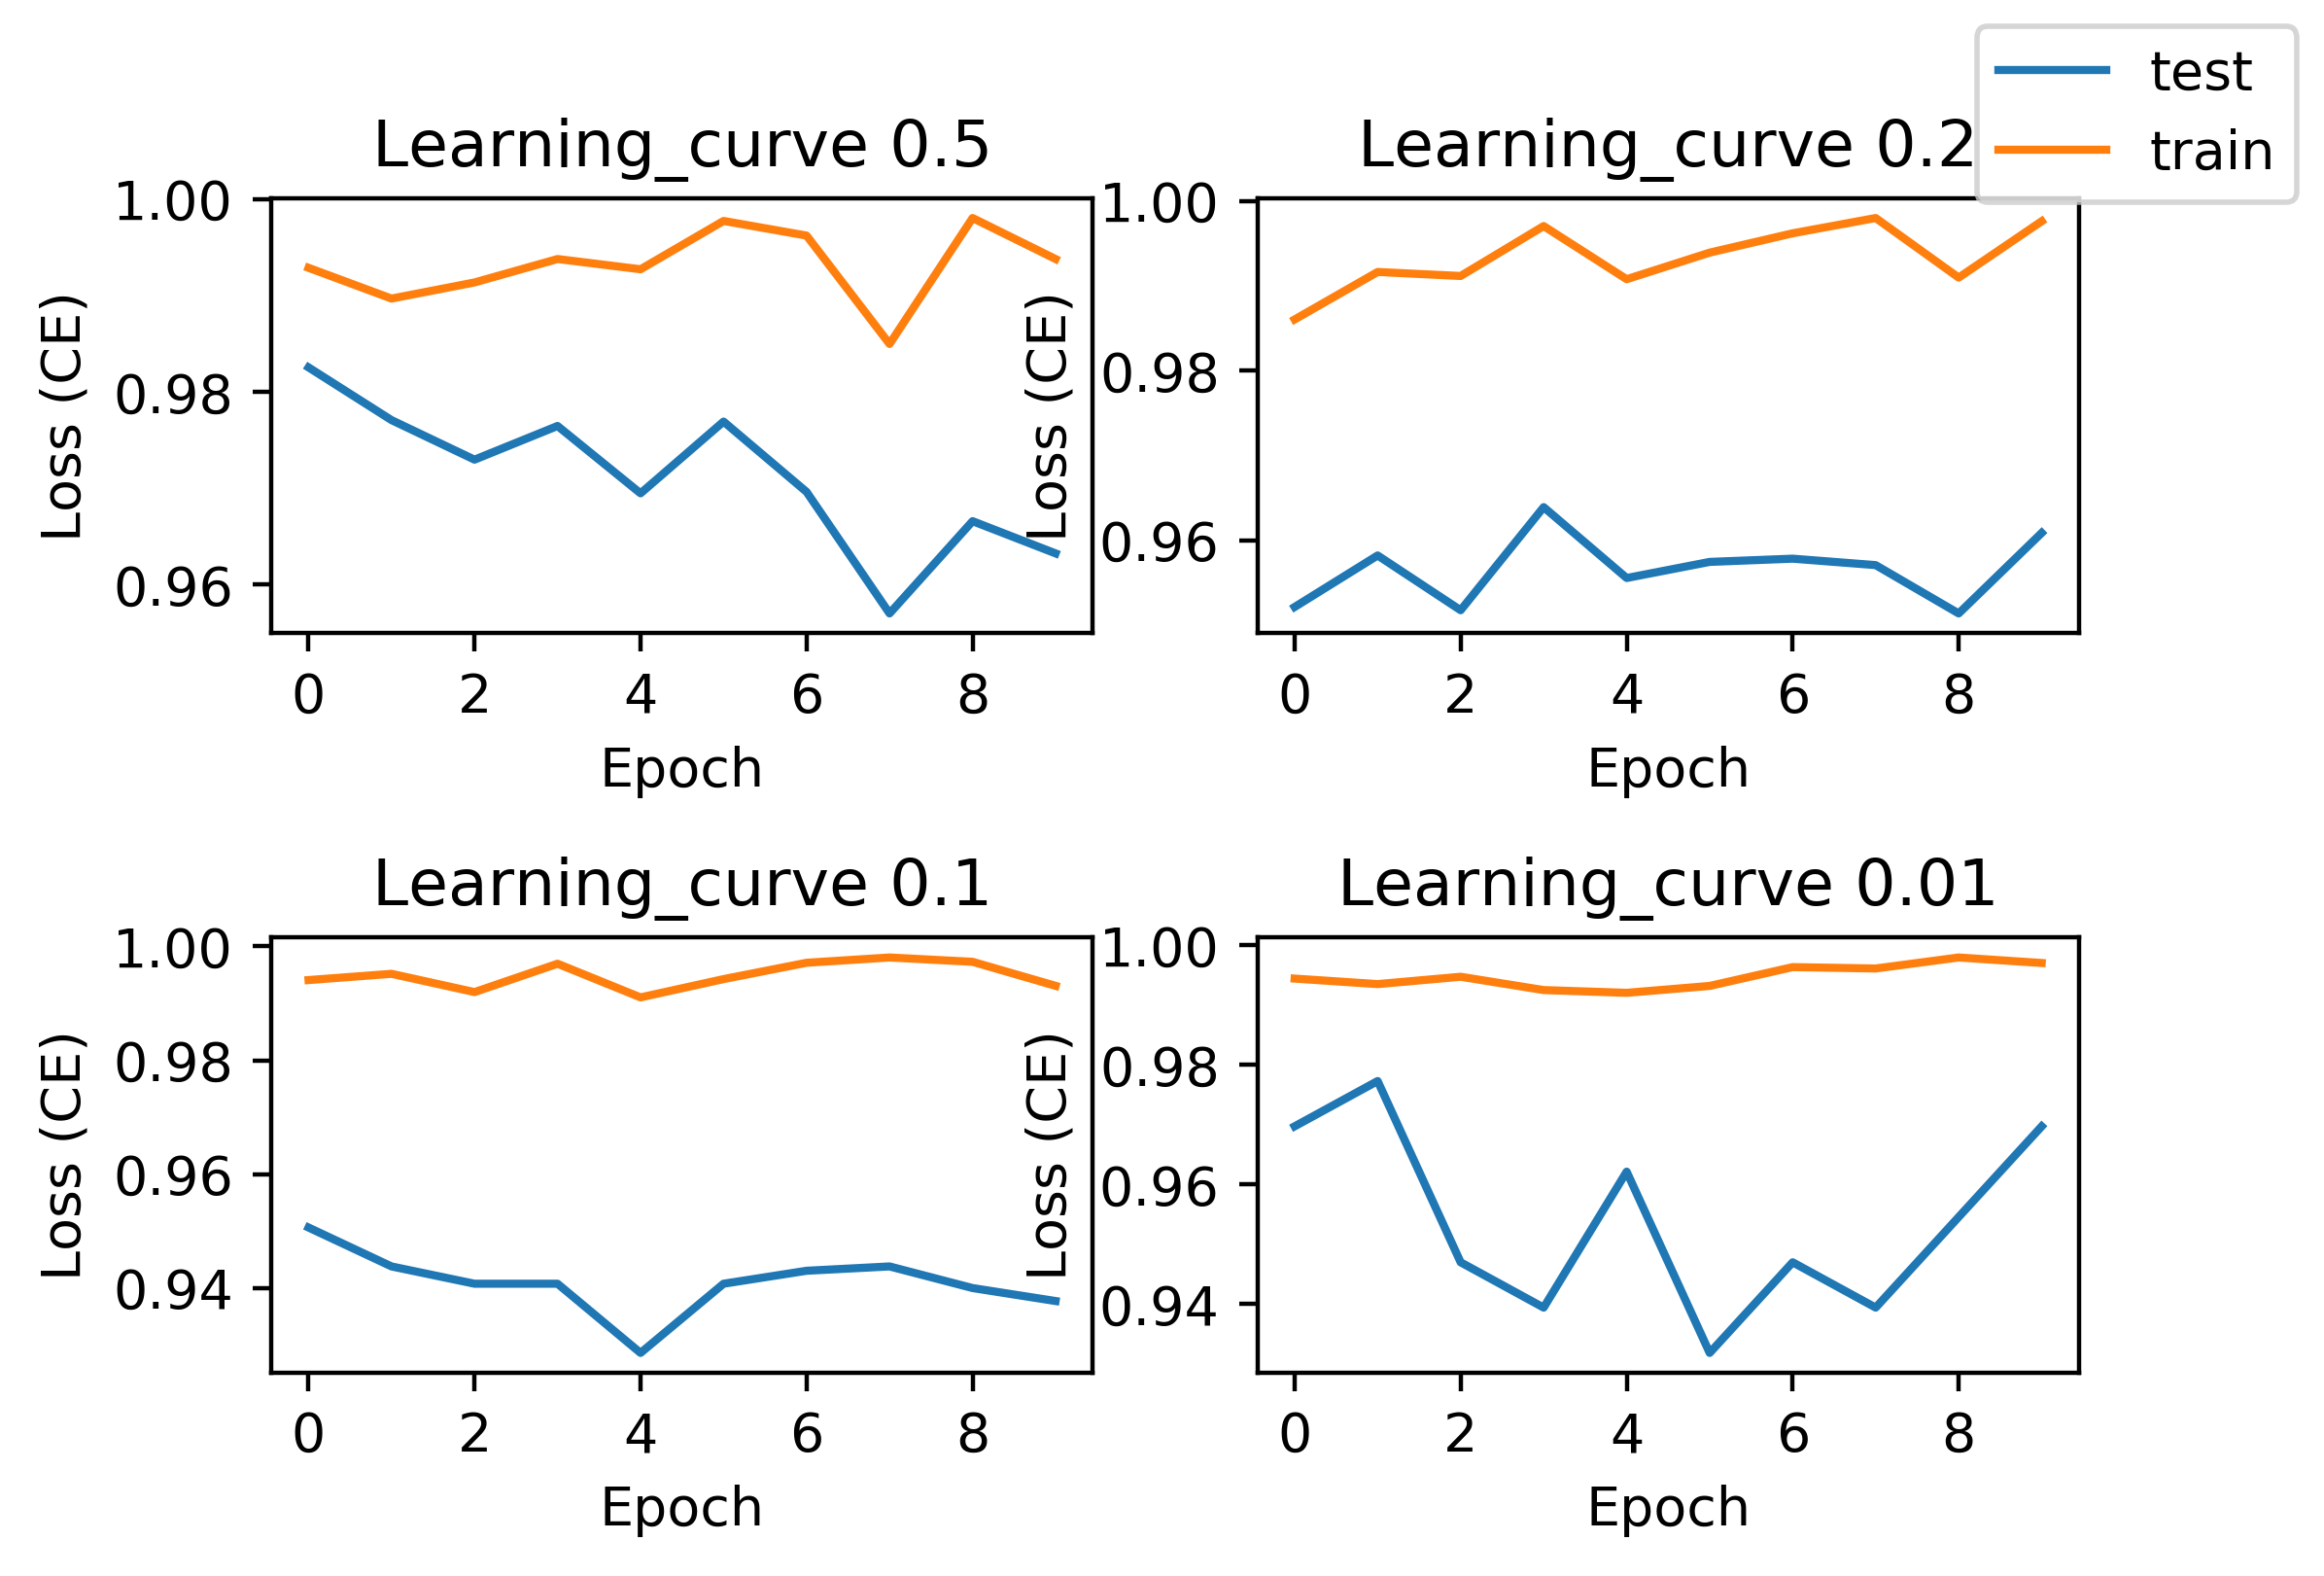

In [53]:
f, axarr = plt.subplots(2, 2)
for i, split in enumerate(splits):
    x = range(10)
    y1 = all_metrics[i]['test']['accuracy']
    y2 = all_metrics[i]['train']['accuracy']
    axarr[int(i/2), i % 2].plot(y1, label="test")
    axarr[int(i/2), i % 2].plot(y2, label="train")
    axarr[int(i/2), i % 2].set_title('Learning_curve {}'.format(split))
    axarr[int(i/2), i % 2].set_xlabel('Epoch')
    axarr[int(i/2), i % 2].set_ylabel('Loss (CE)')
f.subplots_adjust(hspace=0.7)
f.legend(loc=1)
f.figsize=(18, 16)
f.dpi=400

Text(0.5,1,'Learning Curve')

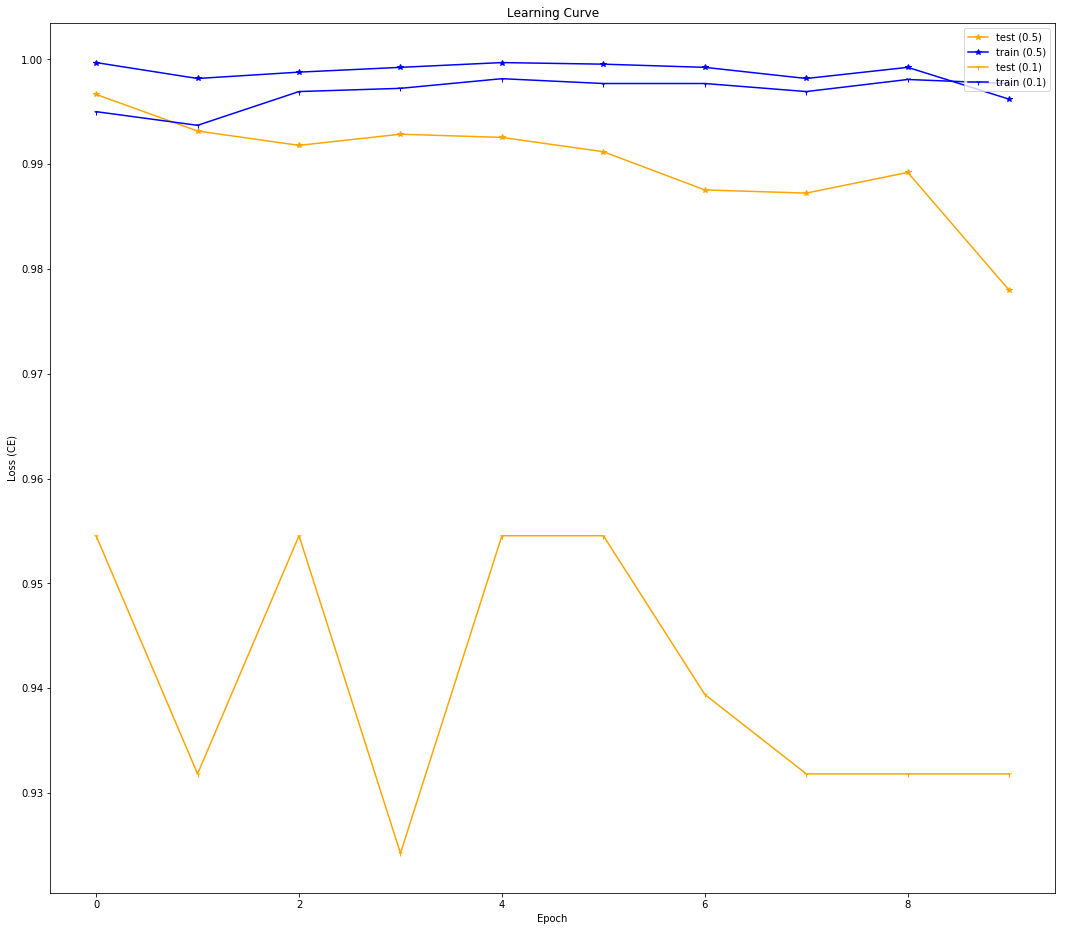

In [60]:
plt.figure(figsize=(18, 16))
y1 = all_metrics[0]['test']['accuracy']
y2 = all_metrics[0]['train']['accuracy']
plt.plot(y1, 'g*-', label="test (0.5)", color='orange')
plt.plot(y2, 'g*-', label="train (0.5)", color='blue')
y1 = all_metrics[3]['test']['accuracy']
y2 = all_metrics[3]['train']['accuracy']
plt.plot(y1, 'g1-', label="test (0.1)",  color='orange')
plt.plot(y2, 'g1-', label="train (0.1)", color='blue')
plt.legend(loc=1)
plt.xlabel('Epoch')
plt.ylabel('Loss (CE)')
plt.title('Learning Curve')

In [71]:
accs_train, accs_test = [],[]
splits = [0.5, 0.2, 0.1, 0.01]
for split in splits:
    _, acc_train, acc_val = train_with_split(split)
    accs_train.append(acc_train)
    accs_test.append(acc_val)
print(accs_train)
print(accs_test)

Train on 6582 samples, validate on 6583 samples
Epoch 1/10
6432/6582 [============================>.] - ETA: 0s - loss: 0.0437 - acc: 0.9859- train accuracy:  0.9993922819811607
- train loss:  0.04304540764655905
- train roc_auc: 0.9999991539836597
- train precision:  0.9989412387506618
- train recall:  0.9989412387506618
- validation accuracy:  0.9855688895640285
- validation loss:  0.062156057264537344
- validation roc_auc: 0.9979411328944768
- validation precision:  0.9813769751693002
- validation recall:  0.9655746807329262
6582/6582 [==============================] - 4s 569us/step - loss: 0.0430 - acc: 0.9860 - val_loss: 0.0622 - val_acc: 0.9856
Epoch 2/10
6464/6582 [============================>.] - ETA: 0s - loss: 0.0322 - acc: 0.9907- train accuracy:  0.9998480704952902
- train loss:  0.03235575346394441
- train roc_auc: 0.9999989283793023
- train precision:  0.9994708994708995
- train recall:  1.0
- validation accuracy:  0.9869360473948048
- validation loss:  0.049594168822261

11712/11848 [============================>.] - ETA: 0s - loss: 0.0383 - acc: 0.9885- train accuracy:  0.9977211343686698
- train loss:  0.03870357512217951
- train roc_auc: 0.9999778030491171
- train precision:  0.9928358208955224
- train recall:  0.9990988284770201
- validation accuracy:  0.9506454062262718
- validation loss:  0.2310448641709887
- validation roc_auc: 0.9880714020793009
- validation precision:  0.9
- validation recall:  0.9224376731301939
11848/11848 [==============================] - 5s 409us/step - loss: 0.0387 - acc: 0.9881 - val_loss: 0.2310 - val_acc: 0.9506
Epoch 8/10
11744/11848 [============================>.] - ETA: 0s - loss: 0.0415 - acc: 0.9881- train accuracy:  0.9991559756920999
- train loss:  0.04118569491914057
- train roc_auc: 0.9999766041669407
- train precision:  1.0
- train recall:  0.9969960949234005
- validation accuracy:  0.9483675018982536
- validation loss:  0.20864015552034954
- validation roc_auc: 0.9877997542855156
- validation precision:  0

132/132 [==============================] - 0s 106us/step
[0.99878456396232151, 0.99943030763387775, 0.99704591492234973, 0.99785160745799129]
[0.97751784904123018, 0.96923661225203361, 0.95899772214092982, 0.95454545454545459]


Text(0.5,1,'Learning Curve')

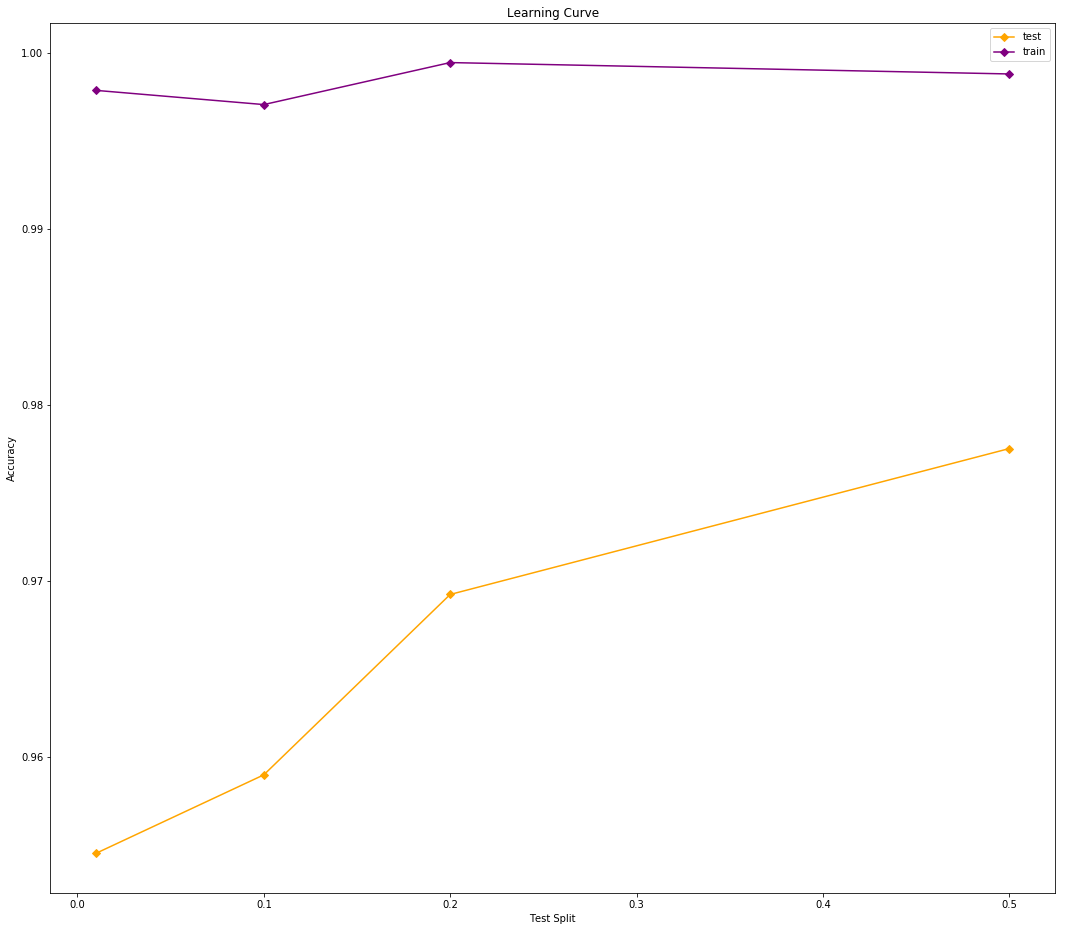

In [73]:

plt.figure(figsize=(18, 16))
plt.plot(splits, accs_test, 'gD-', label="test",  color='orange')
plt.plot(splits, accs_train, 'gD-', label="train", color='purple')
plt.legend(loc=1)
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Learning Curve')